In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

In [2]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(9,5)})

#const
path = os.path.join('..', 'data')

### Data cleaning

In [3]:
def clean_data(filename):
    
    if filename == 'Men 100m.csv':
        df = pd.read_csv(os.path.join(path, filename))[['Mark', 'Date']]
        df = df.rename(columns={'Mark':'Time'})
    else:
        df = pd.read_csv(os.path.join(path, filename))[['Date', 'Time']]
        
    df.dropna(subset=['Time'], axis=0, how='all', inplace=True)
    
    if filename in ('Men 10km.csv', 'Women 10km.csv', 'Men marathon.csv', 'Women marathon.csv'):
        df['Time'] = df['Time'].str.extract(r'^(\d{1,2}.\d{2}.\d{0,2})', expand=False)
    else:
        df['Time'] = df['Time'].str.extract(r'^(\d{1,2}.\d{1,4})', expand=False)
    
    if filename in ('Men marathon.csv', 'Women marathon.csv', 'Men 400m.csv', 'Women 100m.csv'):
        df['Date'] = df['Date'].str.extract(r'^(\w{3,9}\s\d{1,2}\,\s\d{4})', expand=False)
        df['Date'] = pd.to_datetime(df['Date'])
    elif filename == 'Women 400m.csv':
        df['Date'] = df['Date'].str.extract(r'^(\d{1,2}\s\w{3,9}\s\d{4})', expand=False)
        df['Date'] = pd.to_datetime(df['Date'])
    else:
        df['Date'] = pd.to_datetime(df['Date'])
    
    df = df.sort_values(by='Date')

    return df

In [4]:
men_marathon = clean_data('Men marathon.csv')
men10km = clean_data('Men 10km.csv')
men100m = clean_data('Men 100m.csv')
men400m = clean_data('Men 400m.csv')

women_marathon = clean_data('Women marathon.csv')
women_marathon.at[39, 'Time'] = '5:40:00'
women10km = clean_data('Women 10km.csv')
women100m = clean_data('Women 100m.csv')
women400m = clean_data('Women 400m.csv')

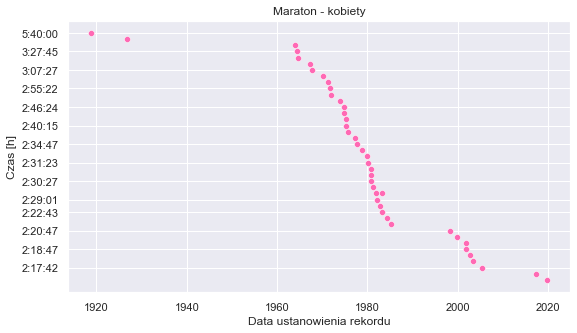

In [5]:
sns.scatterplot(data=women_marathon, x='Date', y='Time', color='hotpink')
plt.yticks(women_marathon['Time'][::3])
plt.ylabel('Czas [h]')
plt.xlabel('Data ustanowienia rekordu')
plt.title('Maraton - kobiety')
plt.savefig('images/Maraton_kobiety')
plt.show()

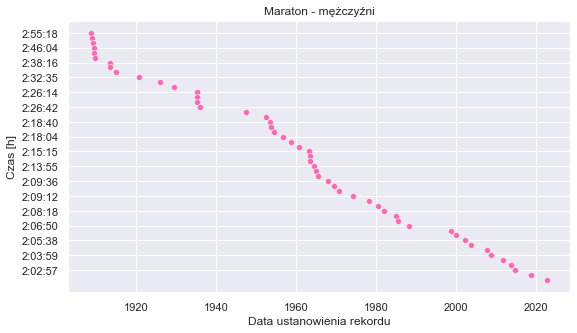

In [6]:
sns.scatterplot(data=men_marathon, x='Date', y='Time', color='hotpink')
plt.yticks(men_marathon['Time'][::3])
plt.ylabel('Czas [h]')
plt.xlabel('Data ustanowienia rekordu')
plt.title('Maraton - mężczyźni')
plt.savefig('images/Maraton_mezczyzni')
plt.show()

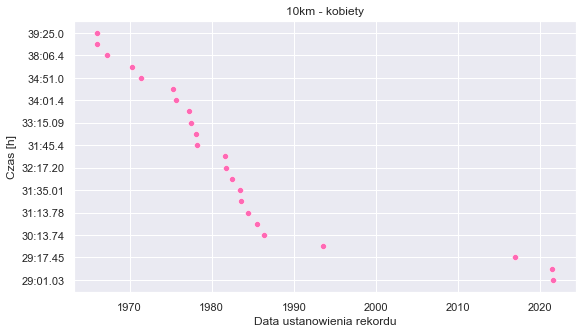

In [7]:
sns.scatterplot(data=women10km, x='Date', y='Time', color='hotpink')
plt.yticks(women10km['Time'][::2])
plt.ylabel('Czas [h]')
plt.xlabel('Data ustanowienia rekordu')
plt.title('10km - kobiety')
plt.savefig('images/10km_kobiety')
plt.show()

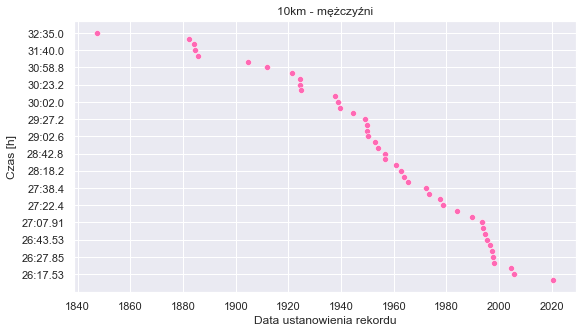

In [8]:
sns.scatterplot(data=men10km, x='Date', y='Time', color='hotpink')
plt.yticks(men10km['Time'][::3])
plt.ylabel('Czas [h]')
plt.xlabel('Data ustanowienia rekordu')
plt.title('10km - mężczyźni')
plt.savefig('images/10km_mezczyzni')
plt.show()

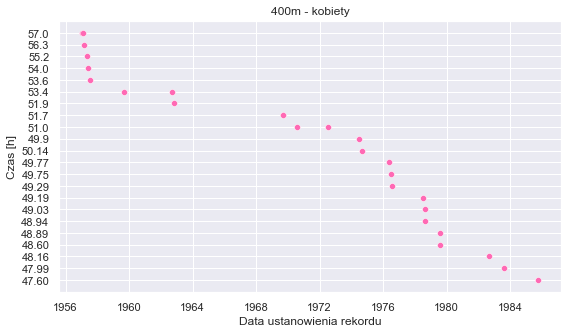

In [9]:
sns.scatterplot(data=women400m, x='Date', y='Time', color='hotpink')
plt.ylabel('Czas [h]')
plt.xlabel('Data ustanowienia rekordu')
plt.title('400m - kobiety')
plt.savefig('images/400m_kobiety')
plt.show()

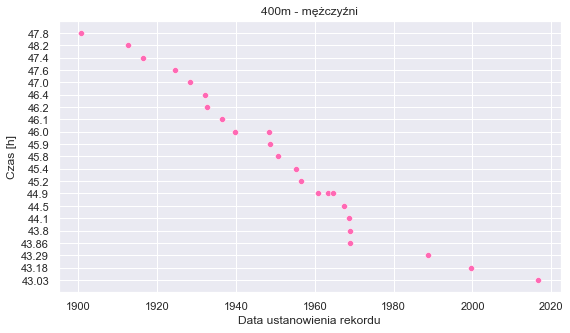

In [10]:
sns.scatterplot(data=men400m, x='Date', y='Time', color='hotpink')
plt.ylabel('Czas [h]')
plt.xlabel('Data ustanowienia rekordu')
plt.title('400m - mężczyźni')
plt.savefig('images/400m_mezczyzni')
plt.show()

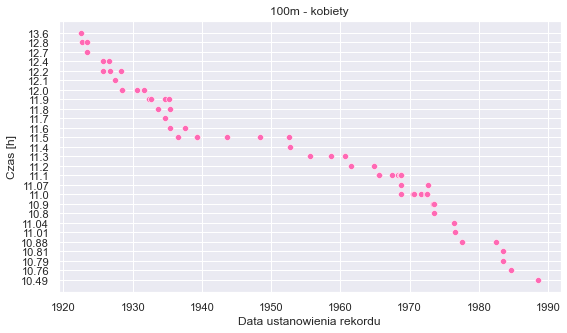

In [11]:
sns.scatterplot(data=women100m, x='Date', y='Time', color='hotpink')
plt.ylabel('Czas [h]')
plt.xlabel('Data ustanowienia rekordu')
plt.title('100m - kobiety')
plt.savefig('images/100m_kobiety')
plt.show()

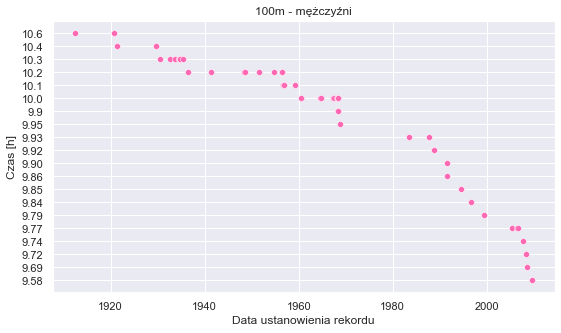

In [12]:
sns.scatterplot(data=men100m, x='Date', y='Time', color='hotpink')
plt.ylabel('Czas [h]')
plt.xlabel('Data ustanowienia rekordu')
plt.title('100m - mężczyźni')
plt.savefig('images/100m_mezczyzni')
plt.show()